# ws 02 IMDB csv

- download csv - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/version/1


In [1]:
import numpy as np
import pandas as pd
import gensim
'''from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, LSTM, Dense'''
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, LSTM, Dense

gensim.__version__ , np.__version__

('4.3.3', '1.26.4')

In [2]:
!pip install --upgrade gensim

## Load pre-trained

In [3]:
import gensim.downloader as api

wv = api.load('glove-wiki-gigaword-100')
wv

[==================================================] 100.0% 128.1/128.1MB downloaded


In [4]:
len(wv.index_to_key)

400000

In [5]:
wv.vector_size

100

In [6]:
wv.similar_by_word('horrible')

[('awful', 0.921971321105957),
 ('terrible', 0.919477105140686),
 ('horrendous', 0.8366580605506897),
 ('dreadful', 0.8184822797775269),
 ('horrific', 0.8176026344299316),
 ('horrifying', 0.8023055791854858),
 ('appalling', 0.7695969939231873),
 ('tragic', 0.7407631874084473),
 ('disgusting', 0.7368147373199463),
 ('ugly', 0.7360007762908936)]

In [7]:
wv.similar_by_word('movie')

[('film', 0.9055121541023254),
 ('movies', 0.8959327340126038),
 ('films', 0.866355299949646),
 ('hollywood', 0.8239826560020447),
 ('comedy', 0.8141382932662964),
 ('drama', 0.7655293941497803),
 ('sequel', 0.7644566893577576),
 ('starring', 0.7473922967910767),
 ('remake', 0.7330190539360046),
 ('shows', 0.716720700263977)]

In [8]:
wv.most_similar('crap',topn=8)

[('shit', 0.6642228364944458),
 ('fucking', 0.6362317800521851),
 ('whack', 0.6277898550033569),
 ('baloney', 0.5797702074050903),
 ('fuck', 0.5778754353523254),
 ('heck', 0.5700293779373169),
 ('damn', 0.5665410161018372),
 ('craziness', 0.5653018355369568)]

 Upload CSV

In [9]:
# upload IMDb CSV
from google.colab import files

uploaded = files.upload()
%ls

Saving IMDB Dataset.csv to IMDB Dataset.csv
'IMDB Dataset.csv'   sample_data/


In [10]:
df = pd.read_csv('IMDB Dataset.csv', encoding='utf-8')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df['label'] = np.where(df.sentiment == 'positive', 1, 0)
df.sample(10)

,review,sentiment,label
33312,"The (DVD)movie ""The Tempest"", directed by Jack...",negative,0
46521,Sam Fuller's excellent PICK UP ON SOUTH STREET...,positive,1
28710,Steven Seagal played in many action movies. Mo...,negative,0
12980,"However closely the movie is to the comics, it...",positive,1
22090,I remember seeing the very first trailer for U...,negative,0
9378,While I have never been a fan of the original ...,negative,0
33883,This movie is awful. At the end of it you will...,negative,0
33079,This film is harmless escapist fun. Something ...,positive,1
41905,Water shows the plight of Indian widows in the...,negative,0
35978,"Wow You guys are way too nice!!!Corny,Corny,Co...",negative,0


 Preprocess and Tokenizer

In [12]:
df['review2'] = df.review.str.lower()

In [13]:
df.iloc[[1,25319,19574,49804]]

,review,sentiment,label,review2
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. <br /><br />the...
25319,WE FAW DOWN <br /><br />Aspect ratio: 1.33:1<b...,negative,0,we faw down <br /><br />aspect ratio: 1.33:1<b...
19574,<br /><br />The play has been heavily edited a...,negative,0,<br /><br />the play has been heavily edited a...
49804,"***May Contain Spoilers*** OK, it wasn't exact...",positive,1,"***may contain spoilers*** ok, it wasn't exact..."


In [14]:
# !pip install beautifulsoup4
from bs4 import BeautifulSoup

def remove_tag(x):
    soup = BeautifulSoup(x)
    return soup.get_text()

df['review2'] = df.review2.apply(remove_tag)

In [15]:
from gensim.parsing.preprocessing import remove_stopwords
df['review2'] = df.review2.apply(remove_stopwords) #

In [16]:
tk = Tokenizer() #

tk.fit_on_texts(df.review2)

In [17]:
tk.word_index


{'movie': 1,
 'film': 2,
 'like': 3,
 "it's": 4,
 'good': 5,
 'it': 6,
 'the': 7,
 'time': 8,
 'story': 9,
 'bad': 10,
 'great': 11,
 'people': 12,
 "don't": 13,
 'way': 14,
 'movies': 15,
 'think': 16,
 'characters': 17,
 'watch': 18,
 'films': 19,
 'seen': 20,
 'character': 21,
 'plot': 22,
 'love': 23,
 'acting': 24,
 'life': 25,
 'best': 26,
 'know': 27,
 'little': 28,
 'i': 29,
 'this': 30,
 'better': 31,
 'end': 32,
 'man': 33,
 'scene': 34,
 'and': 35,
 'scenes': 36,
 'well': 37,
 'real': 38,
 "i'm": 39,
 'watching': 40,
 'thing': 41,
 "doesn't": 42,
 'actors': 43,
 'years': 44,
 'funny': 45,
 "didn't": 46,
 'old': 47,
 'work': 48,
 'actually': 49,
 '10': 50,
 'makes': 51,
 'look': 52,
 'director': 53,
 'all': 54,
 'going': 55,
 'new': 56,
 'lot': 57,
 'one': 58,
 'cast': 59,
 'things': 60,
 'want': 61,
 'pretty': 62,
 'world': 63,
 'horror': 64,
 "can't": 65,
 'young': 66,
 'got': 67,
 'thought': 68,
 'big': 69,
 'fact': 70,
 'long': 71,
 'that': 72,
 "that's": 73,
 "i've": 74,

In [18]:
tk.word_index['this']
testwords = ['this','movie','is','great']
testwords = ['i','like','this','movie']
for i in testwords:
    print(tk.word_index[i])

[tk.word_index[w] for w in testwords]

29
3
30
1


[29, 3, 30, 1]

In [19]:
vocab_size = len(tk.word_index)+1
vocab_size      #

125499

In [20]:
sents_enc = tk.texts_to_sequences(df.review2)

In [21]:
sents_enc[1][:15]

[245,
 28,
 207,
 1244,
 2870,
 17927,
 47,
 8,
 2260,
 1449,
 261,
 13243,
 26544,
 147,
 1715]

In [22]:
sents_len = [len(i) for i in sents_enc]

print("Average Review length:", np.mean(sents_len))
print("Standard Deviation:", round(np.std(sents_len)))
print('Min length:', np.min(sents_len))
print('Max length:', np.max(sents_len))

Average Review length: 115.1484
Standard Deviation: 87
Min length: 3
Max length: 1362


In [23]:
sents_len[:5]

[161, 80, 78, 65, 111]

In [24]:
import pandas as pd
df2 = pd.DataFrame(sents_len, columns=['words'])
df2.describe().round(2)
df2.head()

,words
0,161
1,80
2,78
3,65
4,111


array([[<Axes: title={'center': 'words'}>]], dtype=object)

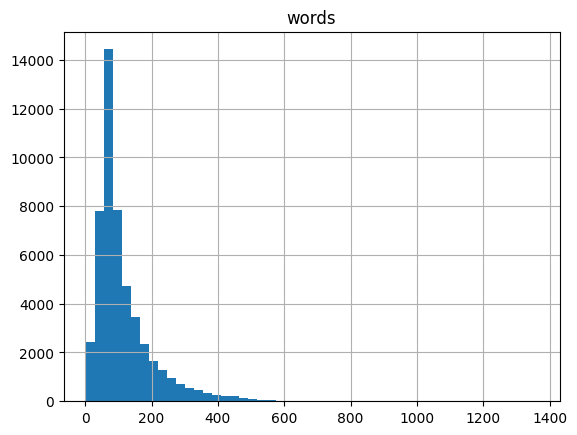

In [25]:
df2.hist(bins=50)

In [26]:
sents_len[:10]

[161, 80, 78, 65, 111, 61, 73, 71, 60, 17]

In [27]:
max_len = 200 #

In [28]:
sents_pad = pad_sequences(sents_enc, truncating='post', padding='post', maxlen=max_len)

In [29]:
check_reviews = sents_pad[:2]
tk.sequences_to_texts(check_reviews)  #

["reviewers mentioned watching 1 oz episode you'll hooked right exactly happened me the thing struck oz brutality unflinching scenes violence set right word go trust me faint hearted timid pulls punches regards drugs sex violence hardcore classic use word it called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish more so scuffles death stares dodgy dealings shady agreements far away i main appeal fact goes shows wouldn't dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn't mess around episode saw struck nasty surreal couldn't ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order away it mannered middle class inmates turned prison bitches lack s

### save and load Tokenizer tk

In [30]:
import pickle

with open('IMDB_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
# load
with open('IMDB_tokenizer.pickle', 'rb') as handle:
    tk2 = pickle.load(handle)

# Train test

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sents_pad, df.label, test_size=.5, random_state=1)

In [33]:
X_train.shape, X_test.shape

((25000, 200), (25000, 200))

## Embedding matrix

In [34]:
embed_size = wv.vector_size  #

embedding_matrix = np.zeros((vocab_size, embed_size))
for word, i in tk.word_index.items():
    if i>=vocab_size:
        continue
    try:
        embedding_vector = wv[word]
        embedding_matrix[i] = embedding_vector[:embed_size]
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), embed_size)

embedding_matrix.shape

(125499, 100)

In [35]:
embedding_matrix.shape

(125499, 100)

In [36]:
embedding_matrix[0][:25]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

Model

#### LSTM

In [37]:
# model=Sequential()
# model.add(Embedding(vocab_size, embed_size,
#                      weights=[embedding_matrix],
#                      trainable=True # False #,
#                 #    input_shape=(X_train.shape[1],) #
#                     ))
# # model.add(LSTM(units=128, activation='tanh'))
# model.add(Bidirectional(LSTM(units=128, activation='tanh')))
# model.add(Dense(units=1, activation='sigmoid'))
# model.summary()

#### GRU

In [38]:
from keras.layers import GRU, Bidirectional

model=Sequential()
model.add(Embedding(vocab_size, embed_size,
                     weights=[embedding_matrix],
                     trainable=True
                #    input_shape=(X_train.shape[1],) #
                    ))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      12,549,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,549,900 (47.87 MB)

 Trainable params: 12,549,900 (47.87 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.6803 - loss: 0.5795 - val_accuracy: 0.8575 - val_loss: 0.3564
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8894 - loss: 0.2838 - val_accuracy: 0.8724 - val_loss: 0.3077
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9458 - loss: 0.1542 - val_accuracy: 0.8852 - val_loss: 0.2927
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9790 - loss: 0.0689 - val_accuracy: 0.8799 - val_loss: 0.3912
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9915 - loss: 0.0301 - val_accuracy: 0.8746 - val_loss: 0.4854
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9970 - loss: 0.0129 - val_accuracy: 0.8742 - val_loss: 0.6021
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9975 - loss: 0.0097 - val_accuracy: 0.8631 - val_loss: 0.5821
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9987 - loss: 0.0048 - val_a

In [40]:
loss, acurracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(acurracy))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8625 - loss: 0.8436
Test accuracy: 0.864


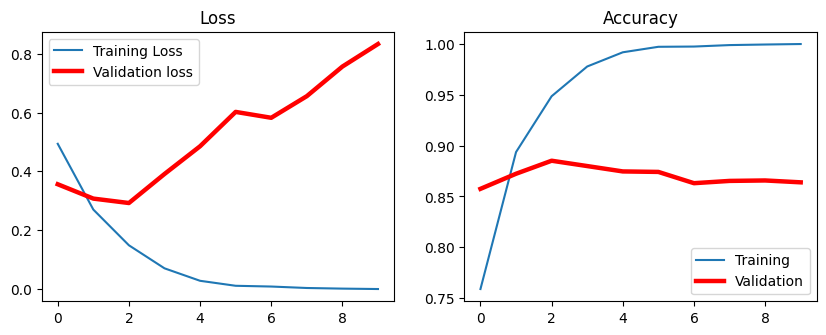

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

## Predict

In [43]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# define the document
comment1 = 'this film is about politics. i do not like it. It sucks, horrible. Can i get money back i do not recommend it'
comment2 = 'this film is about politics. people talk about it. the film is not good. i do not recommend it'
comment3= 'this film is about politics. people like it. my opinion is different.'

words_tk = text_to_word_sequence(comment1)
words_tk

['this',
 'film',
 'is',
 'about',
 'politics',
 'i',
 'do',
 'not',
 'like',
 'it',
 'it',
 'sucks',
 'horrible',
 'can',
 'i',
 'get',
 'money',
 'back',
 'i',
 'do',
 'not',
 'recommend',
 'it']

In [44]:
tk.word_index['this'] , tk.word_index['film']

(30, 2)

In [45]:
new_words_enc = tk.texts_to_sequences([comment2])
new_words_enc

[[30,
  2,
  92,
  550,
  2421,
  12,
  554,
  550,
  6,
  7,
  2,
  92,
  188,
  5,
  29,
  370,
  188,
  230,
  6]]

In [46]:

X_new = pad_sequences(new_words_enc, truncating='post', padding='post', maxlen=max_len)

X_new

array([[  30,    2,   92,  550, 2421,   12,  554,  550,    6,    7,    2,
          92,  188,    5,   29,  370,  188,  230,    6,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [47]:

tk.sequences_to_texts(X_new)

['this film is about politics people talk about it the film is not good i do not recommend it']

In [48]:
result = model.predict(X_new)
print(np.squeeze(result).round(3))
print('Positive' if result[0] > 0.5 else 'Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
0.989
Positive


In [49]:
reviews_new = [comment1, comment2, comment3]
# print(reviews_new)

for i in reviews_new:
    print(i)

this film is about politics. i do not like it. It sucks, horrible. Can i get money back i do not recommend it
this film is about politics. people talk about it. the film is not good. i do not recommend it
this film is about politics. people like it. my opinion is different.


In [50]:
new_words_enc = tk.texts_to_sequences(reviews_new)
# new_words_enc
X_new = pad_sequences(new_words_enc, truncating='post', padding='post', maxlen=max_len)
results = model.predict(X_new)
print(results.round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
[[0.001]
 [0.989]
 [1.   ]]


In [51]:
y_test[:15].tolist()

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]

In [52]:
result = model.predict(X_test[:15])
print(np.squeeze(result).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0.22 0.   0.   0.   1.   0.   1.   0.   0.   0.   0.03 0.   1.   1.
 0.  ]
